<a href="https://colab.research.google.com/github/ibribr/DT8807/blob/master/ResNet50_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.datasets.fashion_mnist import load_data
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Dropout
from keras.applications.resnet import ResNet50, preprocess_input
from keras.utils import to_categorical
import cv2
from sklearn.metrics import confusion_matrix
from keras.datasets.mnist import load_data

data loaded
(60000, 28, 28)


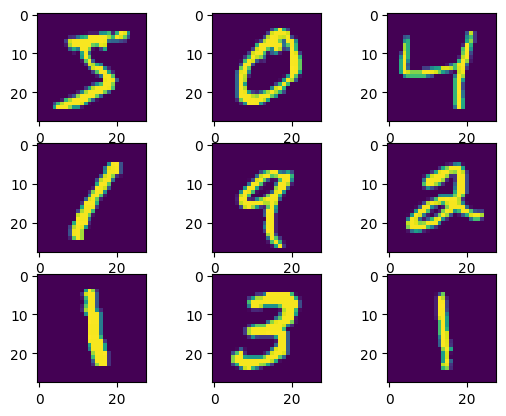

In [9]:
# Load the MNIST dataset
(xtrain, ytrain), (xtest, ytest) = load_data()
print('data loaded')

print(xtrain.shape)

# Rescale the images
xtrain = xtrain/255.0
xtest = xtest/255.0

ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

# create a grid of 3x3 images
for i in range(0, 9):
  plt.subplot(330 + 1 + i)
  plt.imshow(xtrain[i].reshape(28, 28))

# Convert grayscale images to RGB
xtrain = np.stack([xtrain] * 3, axis=-1)
xtest  = np.stack([xtest] * 3, axis=-1)

# Resize images from 28x28 to 224x224 or 32x32
xtrain = np.array([tf.image.resize(img, (32, 32)) for img in xtrain])
xtest  = np.array([tf.image.resize(img, (32, 32)) for img in xtest])

In [10]:
print(xtrain.shape)

model = Sequential()
model.add(ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3)))
model.add(Flatten())
model.add(Dense(units=1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.layers[0].trainable = False

model.summary()

(60000, 32, 32, 3)
94765736/94765736 [==============================] - 1s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 128)               131200    
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                    

Epoch 1/50
235/235 - 21s - loss: 0.9259 - accuracy: 0.6941 - val_loss: 0.3788 - val_accuracy: 0.8797 - 21s/epoch - 88ms/step
Epoch 2/50
235/235 - 8s - loss: 0.4447 - accuracy: 0.8560 - val_loss: 0.2933 - val_accuracy: 0.9108 - 8s/epoch - 33ms/step
Epoch 3/50
235/235 - 8s - loss: 0.3942 - accuracy: 0.8734 - val_loss: 0.2743 - val_accuracy: 0.9103 - 8s/epoch - 33ms/step
Epoch 4/50
235/235 - 7s - loss: 0.3671 - accuracy: 0.8814 - val_loss: 0.2556 - val_accuracy: 0.9173 - 7s/epoch - 31ms/step
Epoch 5/50
235/235 - 7s - loss: 0.3615 - accuracy: 0.8830 - val_loss: 0.2375 - val_accuracy: 0.9225 - 7s/epoch - 30ms/step
Epoch 6/50
235/235 - 7s - loss: 0.3534 - accuracy: 0.8868 - val_loss: 0.2310 - val_accuracy: 0.9254 - 7s/epoch - 29ms/step
Epoch 7/50
235/235 - 7s - loss: 0.3477 - accuracy: 0.8877 - val_loss: 0.2128 - val_accuracy: 0.9299 - 7s/epoch - 31ms/step
Epoch 8/50
235/235 - 7s - loss: 0.3484 - accuracy: 0.8875 - val_loss: 0.2108 - val_accuracy: 0.9345 - 7s/epoch - 30ms/step
Epoch 9/50
235

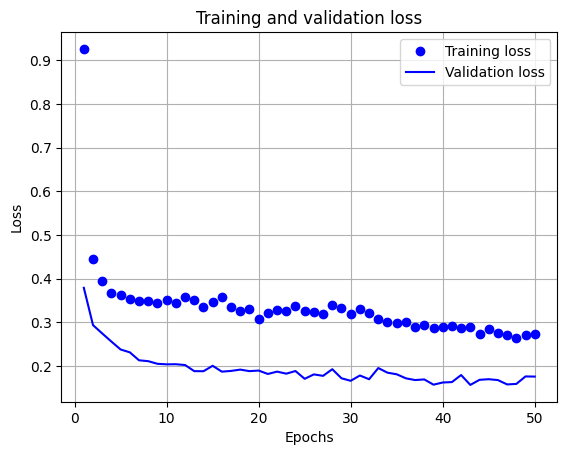

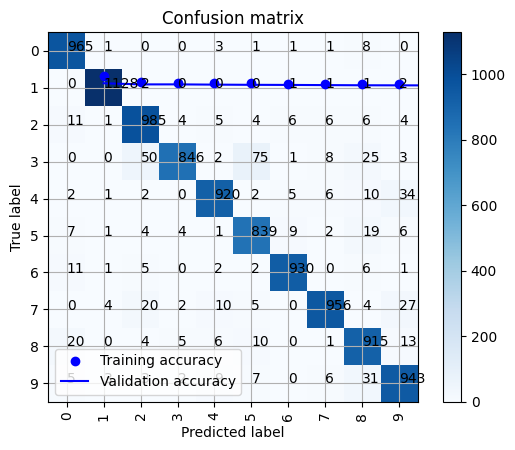

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(xtrain, ytrain, batch_size=256, epochs=50, validation_data=(xtest, ytest), verbose=2, shuffle=True)

print(hist.history.keys())
loss = hist.history['loss']
print(np.mean(loss))
accuracy = hist.history['accuracy']
val_loss = hist.history['val_loss']
val_accuracy = hist.history['val_accuracy']

print('Training and validation loss    : ', np.mean(loss), np.mean(val_loss))
print('Training and validation accuracy: ', np.mean(accuracy), np.mean(val_accuracy))

ypred = model.predict(xtest)
score = model.evaluate(xtest, ytest)
print('accuracy :', score)

epochs = range(1, len(loss)+1)

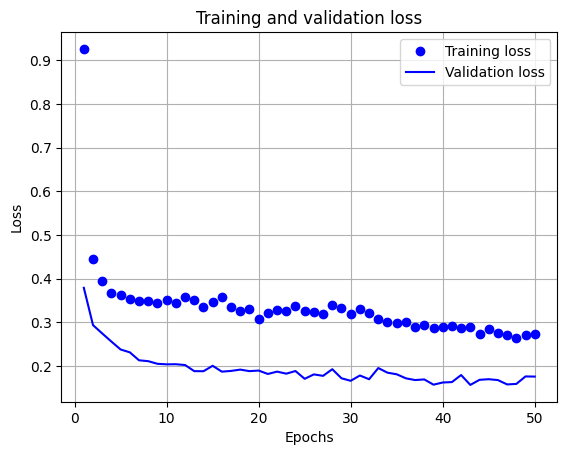

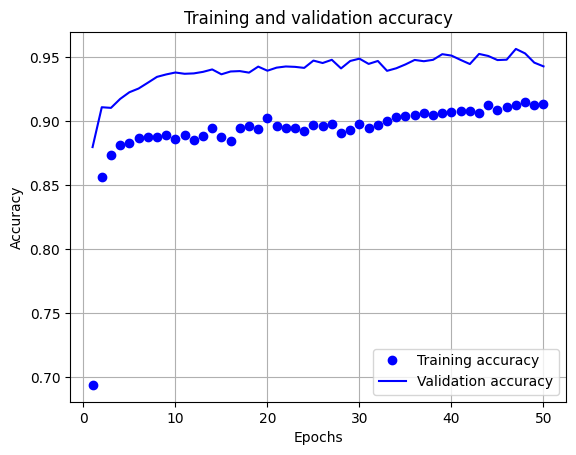

In [13]:
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.figure()
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

313/313 [==============================] - 3s 9ms/step


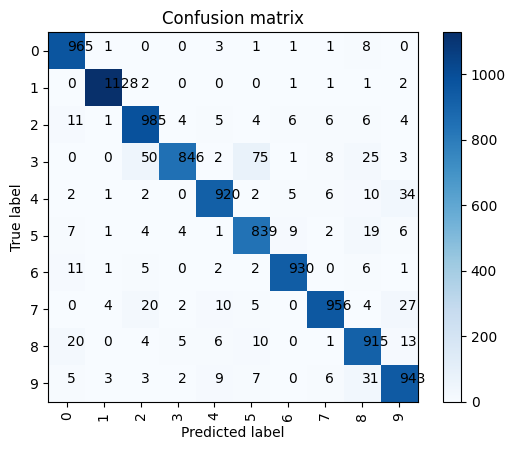

In [14]:
cm_labels = ['0','1','2','3','4','5','6','7','8','9']
cm = confusion_matrix(np.argmax(ytest, axis=1), np.argmax(model.predict(xtest), axis=1))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.colorbar()
indexes = np.arange(len(cm_labels))
for i in indexes:
  for j in indexes:
    plt.text(j, i, cm[i, j])
plt.xticks(indexes, cm_labels, rotation=90)
plt.xlabel('Predicted label')
plt.yticks(indexes, cm_labels)
plt.ylabel('True label')
plt.title('Confusion matrix')
plt.show()